In [356]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [357]:
df = pd.read_csv("life_tables_master.csv")
df

,Unnamed: 0,Year,Demographic,Sex,Age Range,q(x),l(x),d(x),L(x),T(x),e(x)
0,0,2001,total,total,0-1,0.006842,100000.000000,684.164368,99404.093750,7.696164e+06,76.961647
1,1,2001,total,total,1-2,0.000524,99315.835938,52.007931,99289.828125,7.596760e+06,76.490929
2,2,2001,total,total,2-3,0.000337,99263.828125,33.418362,99247.117188,7.497470e+06,75.530739
3,3,2001,total,total,3-4,0.000252,99230.406250,24.965801,99217.921875,7.398224e+06,74.556015
4,4,2001,total,total,4-5,0.000208,99205.437500,20.636427,99195.125000,7.299006e+06,73.574654
...,...,...,...,...,...,...,...,...,...,...,...
15382,15382,2017,black,female,96–97,0.206800,9515.080078,1967.715576,8531.222656,3.304413e+04,3.472817
15383,15383,2017,black,female,97–98,0.223822,7547.364258,1689.269409,6702.729492,2.451291e+04,3.247877
15384,15384,2017,black,female,98–99,0.241511,5858.094727,1414.791504,5150.699219,1.781018e+04,3.040268
15385,15385,2017,black,female,99–100,0.259776,4443.303223,1154.265625,3866.170410,1.265948e+04,2.849114


**Feature Engineering**

In [358]:
# remove "Unnamed: 0" col
df = df.drop(columns = ["Unnamed: 0"])

In [359]:
# remove "total" sex/demographic rows
df = df[df["Sex"] != "total"]
df = df[df["Demographic"] != "total"]

In [360]:
# turn Age Range into scalar based on the lower number in the range:
# 1-2 becomes 1; "100 and over" becomes 100

# maybe just use one-hot encoder and then combine those values into one feature?? not sure

# print(df["Age Range"].unique())
# display(df[df["Age Range"] == "nan"])
# display(df)
# df["Adjusted Age"] = -1
# n,d = np.shape(df)
# # print(df[6792:6793])
# for i in range(1,n):
#     group = df[: i]["Age Range"].values[-1]
# #     print(df[1:2])
# #     print(df[:i].index[-1], group)
#     if type(group) == str:
#         ind = group.find("-")
#         if ind < 0:
#             lower = 105
#         else:
#             lower = group[0:ind]
#         j = df[:i].index[-1]
#         df.loc[j, "Adjusted Age"] = lower
#     print("iter", i, "row",j)

# print(df.columns)
# display(df)
df = df.drop(columns = ["Age Range"])

df

,Year,Demographic,Sex,q(x),l(x),d(x),L(x),T(x),e(x)
404,2001,white,male,0.006209,100000.000000,620.944458,99455.429688,7.487210e+06,74.872108
405,2001,white,male,0.000510,99379.054688,50.704689,99353.703125,7.387755e+06,74.339157
406,2001,white,male,0.000360,99328.351562,35.738022,99310.484375,7.288402e+06,73.376846
407,2001,white,male,0.000266,99292.617188,26.367809,99279.437500,7.189091e+06,72.403076
408,2001,white,male,0.000223,99266.250000,22.169086,99255.164062,7.089812e+06,71.422173
...,...,...,...,...,...,...,...,...,...
15382,2017,black,female,0.206800,9515.080078,1967.715576,8531.222656,3.304413e+04,3.472817
15383,2017,black,female,0.223822,7547.364258,1689.269409,6702.729492,2.451291e+04,3.247877
15384,2017,black,female,0.241511,5858.094727,1414.791504,5150.699219,1.781018e+04,3.040268
15385,2017,black,female,0.259776,4443.303223,1154.265625,3866.170410,1.265948e+04,2.849114


In [361]:
# print(df["Demographic"].unique())
demographics = pd.get_dummies(df.Demographic, prefix='Demographic')
sex = pd.get_dummies(df.Sex)
# display(sex)
# display(demographics)
# df = OneHotEncoder(drop='first').fit(demographics).transform(df["Demographic"])
# df = df + demographics
df["Is White"] = demographics["Demographic_white"]
df["Is Male"] = sex["male"]
df = df.drop(columns = ["Demographic", "Sex"])
df

,Year,q(x),l(x),d(x),L(x),T(x),e(x),Is White,Is Male
404,2001,0.006209,100000.000000,620.944458,99455.429688,7.487210e+06,74.872108,1,1
405,2001,0.000510,99379.054688,50.704689,99353.703125,7.387755e+06,74.339157,1,1
406,2001,0.000360,99328.351562,35.738022,99310.484375,7.288402e+06,73.376846,1,1
407,2001,0.000266,99292.617188,26.367809,99279.437500,7.189091e+06,72.403076,1,1
408,2001,0.000223,99266.250000,22.169086,99255.164062,7.089812e+06,71.422173,1,1
...,...,...,...,...,...,...,...,...,...
15382,2017,0.206800,9515.080078,1967.715576,8531.222656,3.304413e+04,3.472817,0,0
15383,2017,0.223822,7547.364258,1689.269409,6702.729492,2.451291e+04,3.247877,0,0
15384,2017,0.241511,5858.094727,1414.791504,5150.699219,1.781018e+04,3.040268,0,0
15385,2017,0.259776,4443.303223,1154.265625,3866.170410,1.265948e+04,2.849114,0,0


In [362]:
# adjust values in cols so that their scales fit better in relation to the other features
df = df.dropna(axis = 0)
df

,Year,q(x),l(x),d(x),L(x),T(x),e(x),Is White,Is Male
404,2001,0.006209,100000.000000,620.944458,99455.429688,7.487210e+06,74.872108,1,1
405,2001,0.000510,99379.054688,50.704689,99353.703125,7.387755e+06,74.339157,1,1
406,2001,0.000360,99328.351562,35.738022,99310.484375,7.288402e+06,73.376846,1,1
407,2001,0.000266,99292.617188,26.367809,99279.437500,7.189091e+06,72.403076,1,1
408,2001,0.000223,99266.250000,22.169086,99255.164062,7.089812e+06,71.422173,1,1
...,...,...,...,...,...,...,...,...,...
15382,2017,0.206800,9515.080078,1967.715576,8531.222656,3.304413e+04,3.472817,0,0
15383,2017,0.223822,7547.364258,1689.269409,6702.729492,2.451291e+04,3.247877,0,0
15384,2017,0.241511,5858.094727,1414.791504,5150.699219,1.781018e+04,3.040268,0,0
15385,2017,0.259776,4443.303223,1154.265625,3866.170410,1.265948e+04,2.849114,0,0


**Split into training (80%), validation (10%), and testing (10%) sets.**

In [363]:
y = df['e(x)']
X = df.drop(columns=['e(x)'])

In [364]:
# using scikit learn package - it only splits into train and test, so make a tmp test set and then split 
# that set in half for a validation set 

X_train, X_test_tmp, y_train, y_test_tmp = train_test_split(X, y, test_size=0.2)

X_valid, X_test, y_valid, y_test = train_test_split(X_test_tmp, y_test_tmp, test_size=0.5)

**Create a linear regression and evaluate its accuracy use MSE on the validation set.**

In [365]:
LR = LinearRegression().fit(X_train, y_train)
y_preds = LR.predict(X_valid)

In [366]:
MSE = mean_squared_error(y_valid, y_preds)
MSE

0.11521906726072406

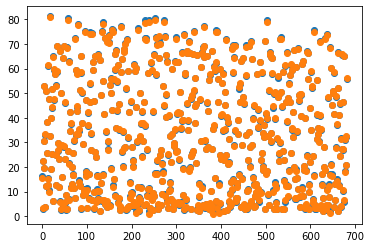

In [367]:
x_axis = range(len(y_valid))
plt.scatter(x_axis, y_valid)
plt.scatter(x_axis, y_preds)